---

<center>

# **© [RsydMathTech](https://github.com/RsydMathTech) 2026 All Rights Reserved**

</center>

---

# Analisis Profil Nasabah untuk Penawaran Deposito Berbasis Customer Value, Risiko, dan Efisiensi Biaya


Notebook ini menyajikan analisis data nasabah untuk memahami profil nilai, risiko, keterlibatan, dan kanal penawaran deposito. Fokus utama proyek ini adalah menghasilkan insight yang dapat digunakan untuk menyusun rekomendasi penawaran deposito.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FuncFormatter

np.random.seed(42)
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv("dataset_perbankan_indo.csv")

# GLOBAL CHART STYLE
DARK_BG = "#0e1117"
AX_BG   = "#161b22"
GRID    = "#2d333b"
TEXT    = "#f0f6fc"

plt.rcParams.update({
    # Background
    "figure.facecolor": DARK_BG,
    "axes.facecolor": AX_BG,
    "savefig.facecolor": DARK_BG,

    # Text
    "text.color": TEXT,
    "axes.labelcolor": TEXT,
    "axes.titlecolor": TEXT,
    "xtick.color": TEXT,
    "ytick.color": TEXT,

    # Grid & edge
    "axes.edgecolor": GRID,
    "grid.color": GRID,

    # Font
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 12,

    "legend.frameon": False
})

sns.set_theme(
    style="dark",
    rc={
        "axes.facecolor": AX_BG,
        "figure.facecolor": DARK_BG,
        "text.color": TEXT,
        "axes.labelcolor": TEXT,
        "xtick.color": TEXT,
        "ytick.color": TEXT
    }
)


df

,usia,pekerjaan,status_pernikahan,pendidikan,saldo_rekening,kategori_saldo,punya_kpr,punya_pinjaman,pernah_gagal_bayar,metode_penawaran,periode_penawaran,frekuensi_kontak,durasi_interaksi_detik,pernah_ditawari_sebelumnya,hasil_penawaran_sebelumnya,respon_penawaran_deposito,lama_nasabah_tahun,segmen_nasabah
0,56,tidak_bekerja,menikah,sd,2757691,rendah,tidak,tidak,tidak,whatsapp,Jul,2,75,ya,berhasil,0,8,loyal
1,46,wiraswasta,lajang,sma,5531440,menengah,tidak,tidak,tidak,telepon,Des,1,149,tidak,tidak_ada,0,19,loyal
2,32,pns,menikah,sma,17308773,menengah,tidak,tidak,tidak,whatsapp,Apr,2,99,tidak,tidak_ada,1,4,existing
3,60,karyawan,menikah,d3,3844860,rendah,tidak,tidak,tidak,telepon,Jan,2,212,ya,gagal,0,11,loyal
4,25,karyawan,cerai,smp,38608410,menengah,tidak,ya,tidak,email,Agu,3,78,tidak,tidak_ada,0,12,loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,28,karyawan,menikah,d3,10635133,menengah,tidak,tidak,tidak,telepon,Jun,3,260,tidak,tidak_ada,0,15,loyal
11996,49,buruh,menikah,smp,8327229,menengah,tidak,ya,tidak,telepon,Jan,1,367,tidak,tidak_ada,0,4,existing
11997,23,tidak_bekerja,lajang,s1,6447967,menengah,tidak,tidak,tidak,telepon,Jun,4,344,tidak,tidak_ada,0,1,existing
11998,52,karyawan,menikah,d3,28580825,menengah,tidak,tidak,tidak,whatsapp,Okt,1,59,tidak,tidak_ada,0,10,loyal


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   usia                        12000 non-null  int64 
 1   pekerjaan                   12000 non-null  object
 2   status_pernikahan           12000 non-null  object
 3   pendidikan                  11880 non-null  object
 4   saldo_rekening              12000 non-null  int64 
 5   kategori_saldo              12000 non-null  object
 6   punya_kpr                   12000 non-null  object
 7   punya_pinjaman              12000 non-null  object
 8   pernah_gagal_bayar          12000 non-null  object
 9   metode_penawaran            12000 non-null  object
 10  periode_penawaran           12000 non-null  object
 11  frekuensi_kontak            12000 non-null  int64 
 12  durasi_interaksi_detik      12000 non-null  int64 
 13  pernah_ditawari_sebelumnya  12000 non-null  ob

In [3]:
df.describe()

,usia,saldo_rekening,frekuensi_kontak,durasi_interaksi_detik,respon_penawaran_deposito,lama_nasabah_tahun
count,"12,000.00","12,000.00","12,000.00","12,000.00","12,000.00","12,000.00"
mean,40.97,"21,374,067.58",2.76,206.27,0.15,7.18
std,13.47,"29,044,352.38",1.43,169.03,0.35,5.38
min,18.00,"166,365.00",1.00,5.00,0.00,0.00
25%,29.00,"5,535,736.00",2.00,88.00,0.00,3.00
50%,41.00,"12,237,946.50",3.00,162.00,0.00,6.00
75%,53.00,"25,877,163.25",4.00,274.25,0.00,11.00
max,64.00,"651,562,123.00",10.00,"1,981.00",1.00,20.00


In [4]:
df['pendidikan'] = df['pendidikan'].fillna('Unknown')

df[['pendidikan']]

,pendidikan
0,sd
1,sma
2,sma
3,d3
4,smp
...,...
11995,d3
11996,smp
11997,s1
11998,d3


## Penjelasan Dataset

Dataset terdiri dari 12.000 baris data nasabah dengan 18 variabel yang mencerminkan berbagai dimensi penting dalam konteks perbankan, yaitu profil demografis, nilai finansial, risiko, serta perilaku respons terhadap penawaran.

### 1. Profil Nasabah
Variabel seperti usia, pekerjaan, status pernikahan, dan tingkat pendidikan digunakan untuk memahami karakteristik dasar nasabah serta membantu segmentasi awal.

### 2. Nilai Finansial Nasabah
Nilai nasabah direpresentasikan melalui saldo rekening, kategori saldo, serta lama menjadi nasabah. Kombinasi variabel ini digunakan sebagai pendekatan untuk menilai potensi kontribusi jangka panjang nasabah terhadap bank.

### 3. Risiko Nasabah
Indikator risiko mencakup kepemilikan pinjaman, riwayat gagal bayar, serta kepemilikan kredit pemilikan rumah (KPR). Informasi ini digunakan untuk membangun pendekatan kehati-hatian dalam prioritisasi penawaran, tanpa bergantung sepenuhnya pada model prediktif.

### 4. Perilaku dan Respons Penawaran
Variabel frekuensi kontak, durasi interaksi, metode penawaran, serta riwayat hasil penawaran sebelumnya memberikan gambaran mengenai tingkat keterlibatan dan responsivitas nasabah terhadap aktivitas pemasaran bank.

### 5. Target Analisis
Variabel `respon_penawaran_deposito` digunakan sebagai target untuk mengidentifikasi apakah nasabah merespons positif terhadap penawaran deposito. Target digunakan sebagai indikator outcome historis untuk memahami pola respons nasabah terhadap penawaran deposito.

---

## Data Readiness Check

Sebelum digunakan dalam analisis, data dievaluasi secara ringkas untuk memastikan kelayakan dalam mendukung pengambilan keputusan bisnis perbankan. Evaluasi difokuskan pada kesiapan data, bukan pada pembersihan agresif.

Empat aspek utama yang diperhatikan:
- Kelengkapan data
- Konsistensi kategori
- Distribusi target respons
- Keberadaan nilai ekstrem


In [5]:
# Distribusi target respon penawaran deposito
target_dist = df['respon_penawaran_deposito'].value_counts(normalize=True) * 100

target_dist

respon_penawaran_deposito
0   85.47
1   14.53
Name: proportion, dtype: float64

### Distribusi Respon Penawaran

Distribusi target menunjukkan adanya ketidakseimbangan antara nasabah yang merespons dan tidak merespons penawaran deposito. Kondisi ini umum terjadi pada pemasaran perbankan, di mana tingkat konversi cenderung rendah. Ketidakseimbangan target menunjukkan bahwa sebagian besar nasabah tidak merespons penawaran, sehingga strategi penawaran perlu selektif dalam menentukan sasaran.


---

## Feature Engineering

Tahap feature engineering difokuskan pada pembentukan komponen strategis yang akan digunakan dalam proses prioritisasi nasabah. Fitur tidak dibuat sebanyak mungkin, melainkan dipilih secara selektif agar tetap relevan dengan keputusan bisnis perbankan.

Empat dimensi utama yang dibangun:
1. Nilai nasabah (Customer Value)
2. Risiko nasabah (Customer Risk)
3. Respons dan keterlibatan (Behavioral Responsiveness)
4. Proksi biaya penawaran (Cost Proxy)

Seluruh fitur dirancang agar mudah diinterpretasikan dan dapat digunakan langsung dalam kerangka pengambilan keputusan.


### A. Nilai Nasabah

Dimensi nilai nasabah dibangun untuk merepresentasikan potensi kontribusi ekonomi nasabah terhadap bank. Penilaian tidak hanya mempertimbangkan saldo saat ini, tetapi juga loyalitas yang tercermin dari lama hubungan nasabah dengan bank.


In [6]:
# Skor nilai nasabah berbasis saldo dan lama menjadi nasabah
df['skor_nilai_nasabah'] = (
    (df['saldo_rekening'] / df['saldo_rekening'].max()) * 0.6 +
    (df['lama_nasabah_tahun'] / df['lama_nasabah_tahun'].max()) * 0.4
)

df[['skor_nilai_nasabah']]

,skor_nilai_nasabah
0,0.16
1,0.39
2,0.10
3,0.22
4,0.28
...,...
11995,0.31
11996,0.09
11997,0.03
11998,0.23


### B. Risiko Nasabah

Risiko nasabah didekati menggunakan aturan sederhana (rule-based) yang umum digunakan dalam praktik perbankan. Pendekatan ini dipilih untuk menjaga transparansi dan kemudahan penjelasan, dengan pendekatan aturan sederhana.

In [7]:
# Skor risiko berbasis kepemilikan pinjaman dan riwayat gagal bayar
df['skor_risiko_nasabah'] = 0

df.loc[df['punya_pinjaman'] == 'ya', 'skor_risiko_nasabah'] += 1
df.loc[df['pernah_gagal_bayar'] == 'ya', 'skor_risiko_nasabah'] += 1

df[['skor_risiko_nasabah']]

,skor_risiko_nasabah
0,0
1,0
2,0
3,0
4,1
...,...
11995,0
11996,1
11997,0
11998,0


### C. Respons dan Keterlibatan Nasabah

Dimensi ini digunakan untuk menggambarkan tingkat keterlibatan nasabah terhadap aktivitas penawaran. Frekuensi dan durasi interaksi digunakan sebagai proksi tingkat keterlibatan nasabah.

In [8]:
# Skor keterlibatan berdasarkan intensitas interaksi
df['skor_keterlibatan_nasabah'] = (
    df['frekuensi_kontak'] * df['durasi_interaksi_detik']
)

# Normalisasi sederhana agar skala lebih stabil
df['skor_keterlibatan_nasabah'] = (
    df['skor_keterlibatan_nasabah'] /
    df['skor_keterlibatan_nasabah'].max()
)

df[['skor_keterlibatan_nasabah']]

,skor_keterlibatan_nasabah
0,0.02
1,0.02
2,0.02
3,0.04
4,0.02
...,...
11995,0.08
11996,0.04
11997,0.14
11998,0.01


### D. Proksi Biaya Penawaran

Metode penawaran memiliki biaya yang berbeda dalam implementasi operasional. Untuk merepresentasikan perbedaan tersebut, digunakan proksi biaya sederhana berdasarkan jenis kanal komunikasi yang digunakan.


In [9]:
# Proksi biaya berdasarkan metode penawaran
df['skor_biaya_penawaran'] = df['metode_penawaran'].map({
    'telepon': 3,
    'whatsapp': 2,
    'email': 1
})

df[['skor_biaya_penawaran']]

,skor_biaya_penawaran
0,2
1,3
2,2
3,3
4,1
...,...
11995,3
11996,3
11997,3
11998,2


---

## Exploratory Data Analysis (EDA)

Tahap Exploratory Data Analysis (EDA) pada proyek ini **tidak ditujukan untuk eksplorasi bebas**, melainkan untuk memastikan bahwa fitur-fitur strategis yang telah dibangun **masuk akal secara bisnis, stabil secara statistik, dan relevan untuk pengambilan keputusan perbankan**.

EDA dilakukan secara terarah dengan tiga tujuan utama:
1. Memahami distribusi fitur strategis hasil feature engineering
2. Mengidentifikasi potensi nilai ekstrem atau ketidakwajaran data
3. Mengamati indikasi hubungan antara fitur strategis dan respons nasabah terhadap penawaran deposito

Pendekatan ini memastikan bahwa proses analisis tetap selaras dengan kebutuhan bisnis dan dapat dilanjutkan ke tahap penyusunan skor prioritas nasabah.


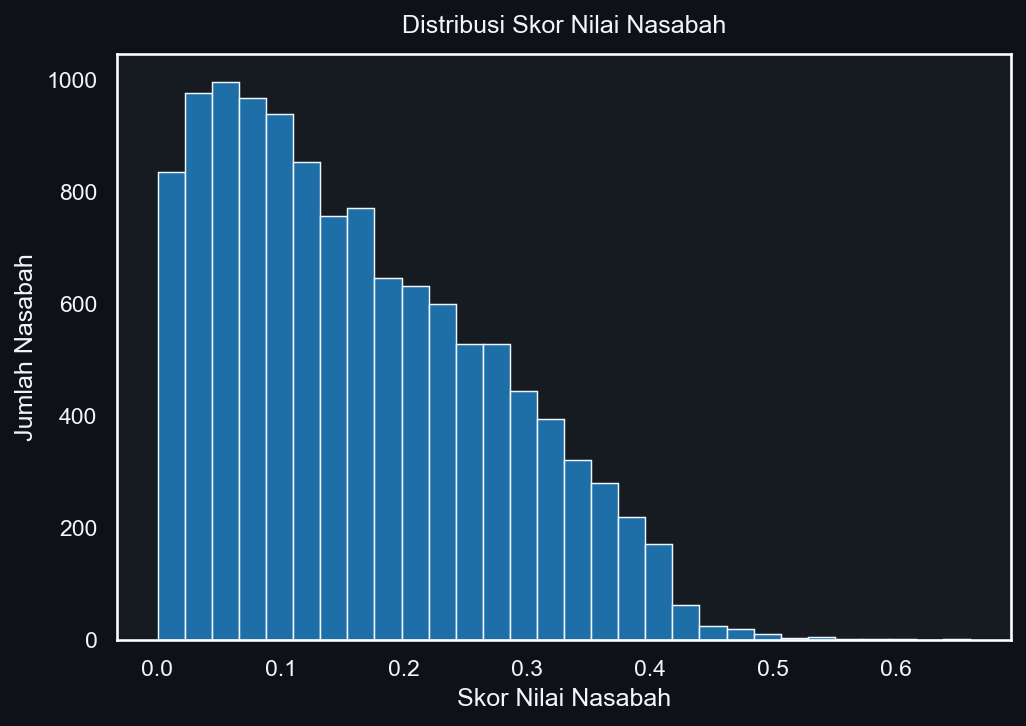

In [10]:
plt.figure(figsize=(7, 5), dpi=150)

# Glow layer
sns.histplot(
    df['skor_nilai_nasabah'],
    bins=30,
    color="#1f77b4",
    alpha=0.15,
    linewidth=0
)

# Main layer
sns.histplot(
    df['skor_nilai_nasabah'],
    bins=30,
    color="#1f77b4",
    edgecolor="#f0f6fc",
    linewidth=0.7,
    alpha=0.9
)

plt.title("Distribusi Skor Nilai Nasabah", pad=10)
plt.xlabel("Skor Nilai Nasabah")
plt.ylabel("Jumlah Nasabah")

plt.tight_layout()
plt.savefig(
    "distribusi_skor_nilai_nasabah.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)
plt.show()

### Interpretasi Visual: Distribusi Skor Nilai Nasabah

Distribusi skor nilai nasabah menunjukkan pola **miring ke kanan (right-skewed)**, yang berarti sebagian besar nasabah terkonsentrasi pada skor nilai rendah. Puncak distribusi berada pada rentang **0.05–0.10**, dengan jumlah nasabah sekitar **hampir 1.000 orang** di area tersebut. Setelah skor melewati **0.4**, jumlah nasabah menurun tajam, dan nasabah dengan skor tinggi (**> 0.5**) relatif **sangat sedikit** dibandingkan keseluruhan populasi.

Secara interpretatif, pola ini menggambarkan bahwa basis nasabah didominasi oleh kelompok bernilai rendah–menengah (sering diasosiasikan sebagai *mass market*), sementara kelompok dengan skor tinggi membentuk ekor distribusi yang kecil namun penting untuk diperhatikan karena kontribusi potensialnya relatif lebih besar. 

Dengan karakter seperti ini, analisis lanjutan maupun penyusunan pendekatan penawaran dapat mempertimbangkan diferensiasi perlakuan: segmen bernilai tinggi dapat diprioritaskan untuk pendekatan yang lebih personal, sedangkan segmen bernilai rendah–menengah lebih cocok untuk pendekatan yang lebih efisien dan berskala (misalnya kanal digital seperti WhatsApp/email), sambil tetap membuka ruang program peningkatan nilai nasabah (*upselling/upsizing*) secara bertahap dari kisaran **~0.1** menuju level yang lebih tinggi (misalnya **~0.3**) melalui penawaran yang relevan.


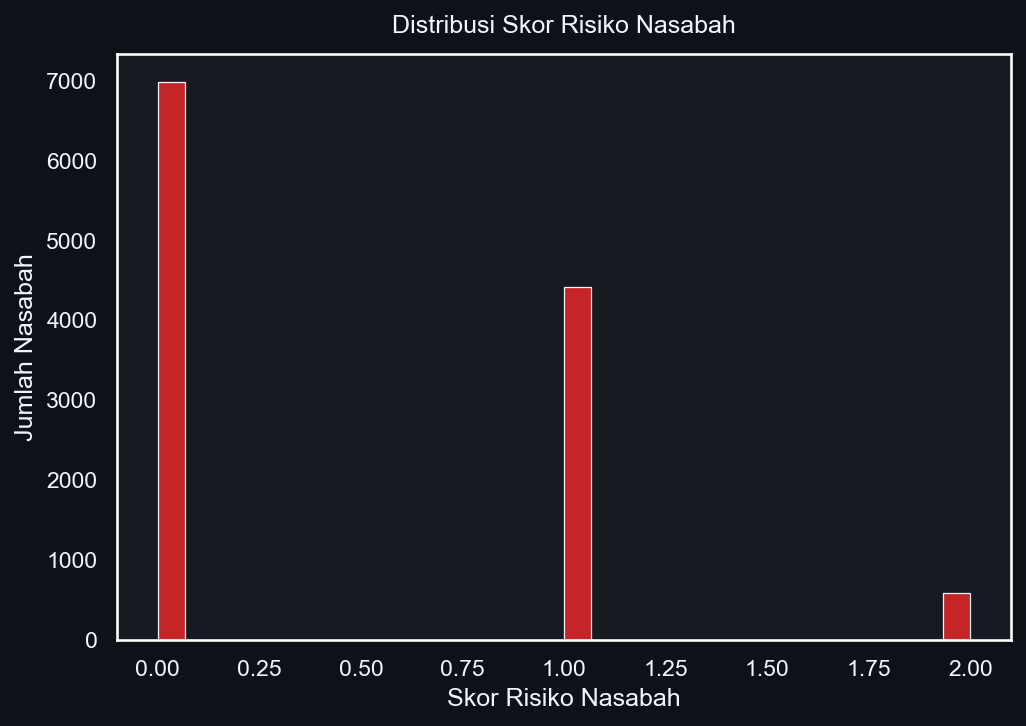

In [11]:
plt.figure(figsize=(7, 5), dpi=150)

# Glow layer
sns.histplot(
    df['skor_risiko_nasabah'],
    bins=30,
    color="#d62728",
    alpha=0.15,
    linewidth=0
)

# Main layer
sns.histplot(
    df['skor_risiko_nasabah'],
    bins=30,
    color="#d62728",
    edgecolor="#f0f6fc",
    linewidth=0.6,
    alpha=0.9
)

plt.title("Distribusi Skor Risiko Nasabah", pad=10)
plt.xlabel("Skor Risiko Nasabah")
plt.ylabel("Jumlah Nasabah")

plt.tight_layout()
plt.savefig(
    "distribusi_skor_risiko_nasabah.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)
plt.show()

### Interpretasi Visual: Distribusi Skor Risiko Nasabah

Berdasarkan visualisasi distribusi skor risiko, terlihat bahwa variabel risiko memiliki karakteristik yang bersifat **diskrit dan berkelompok**, dengan konsentrasi utama pada tiga nilai skor, yaitu **0**, **1**, dan **2**.

Sebagian besar nasabah berada pada skor risiko **0**, dengan jumlah sekitar **7.000 nasabah**, yang menunjukkan dominasi profil risiko rendah dalam basis data. Kelompok dengan skor risiko **1** berjumlah sekitar **4.500 nasabah**, sedangkan kelompok risiko tertinggi (skor **2**) merupakan kelompok paling kecil, yaitu sekitar **500–600 nasabah**.

Pola ini mengindikasikan bahwa distribusi risiko tidak bersifat kontinu seperti skor nilai nasabah, melainkan telah dikategorikan ke dalam kelas-kelas tertentu. Hal ini memungkinkan interpretasi yang lebih jelas antar kelompok risiko, namun juga menunjukkan bahwa variabel ini kemungkinan merepresentasikan hasil kategorisasi atau penilaian risiko yang telah distandarkan sebelumnya.

Dominasi nasabah dengan skor risiko rendah menunjukkan bahwa secara umum basis nasabah berada dalam kondisi risiko yang relatif terkendali. Perbedaan ukuran antar kelompok (0, 1, dan 2) memberikan dasar yang kuat untuk analisis segmentasi berbasis risiko, khususnya dalam membandingkan pola respons, nilai, dan keterlibatan antar kategori.

Dalam konteks analisis selanjutnya, skor risiko ini dapat digunakan sebagai **variabel pembeda (segmentation variable)** untuk mengevaluasi perbedaan perilaku dan karakteristik nasabah, tanpa secara langsung diasumsikan sebagai dasar pengambilan keputusan operasional.


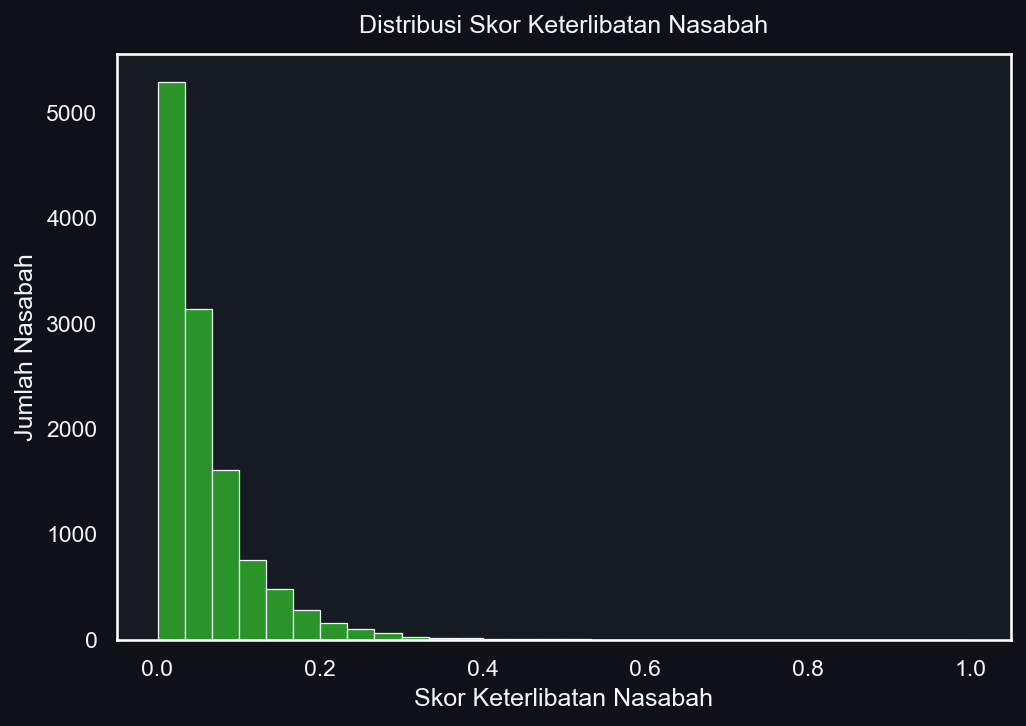

In [12]:
plt.figure(figsize=(7, 5), dpi=150)

# Glow layer
sns.histplot(
    df['skor_keterlibatan_nasabah'],
    bins=30,
    color="#2ca02c",
    alpha=0.15,
    linewidth=0
)

# Main layer
sns.histplot(
    df['skor_keterlibatan_nasabah'],
    bins=30,
    color="#2ca02c",
    edgecolor="#f0f6fc",
    linewidth=0.6,
    alpha=0.9
)

plt.title("Distribusi Skor Keterlibatan Nasabah", pad=10)
plt.xlabel("Skor Keterlibatan Nasabah")
plt.ylabel("Jumlah Nasabah")

plt.tight_layout()
plt.savefig(
    "distribusi_skor_keterlibatan_nasabah.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)
plt.show()

### Interpretasi Visual: Distribusi Skor Keterlibatan Nasabah

Distribusi skor keterlibatan menunjukkan pola **extreme right-skewed**, dengan konsentrasi massa yang sangat besar di nilai mendekati **0.0**. Lebih dari **5.000 nasabah** berada pada rentang skor **0.0–0.05**, menjadikan area ini sebagai puncak distribusi yang sangat dominan. Setelah skor melewati **0.1**, jumlah nasabah menurun secara drastis, dan pada skor di atas **0.4** hampir tidak ditemukan nasabah dengan tingkat keterlibatan yang sangat tinggi.

Pola ini mengindikasikan bahwa mayoritas nasabah berada pada kategori **keterlibatan rendah atau pasif**—memiliki rekening namun jarang bertransaksi, jarang berinteraksi dengan aplikasi, atau minim respons terhadap penawaran bank. Sebaliknya, hanya sebagian kecil nasabah yang benar-benar aktif dan menunjukkan loyalitas penggunaan layanan (skor > **0.2**). Kesenjangan yang lebar antara kelompok pasif dan aktif ini mencerminkan adanya *engagement gap* yang signifikan dalam basis nasabah.

Distribusi ini menunjukkan adanya peluang analitis pada kelompok dengan keterlibatan rendah, yang dapat menjadi objek evaluasi lanjutan terkait pendekatan reaktivasi atau edukasi produk. Fokus utama bank diarahkan pada **reaktivasi massa besar** di rentang skor **0.0–0.1**, misalnya melalui insentif ringan seperti pembebasan biaya administrasi sementara atau *cashback* transaksi untuk mendorong interaksi awal. Pendekatan edukatif terhadap fitur dasar layanan juga lebih relevan dibandingkan penawaran produk kompleks pada segmen ini. Sementara itu, nasabah dengan skor keterlibatan lebih tinggi (**> 0.3**), meskipun jumlahnya relatif kecil, perlu mendapatkan perhatian khusus melalui program loyalitas agar tingkat keterlibatan mereka dapat dipertahankan dan tidak berpindah ke kompetitor.


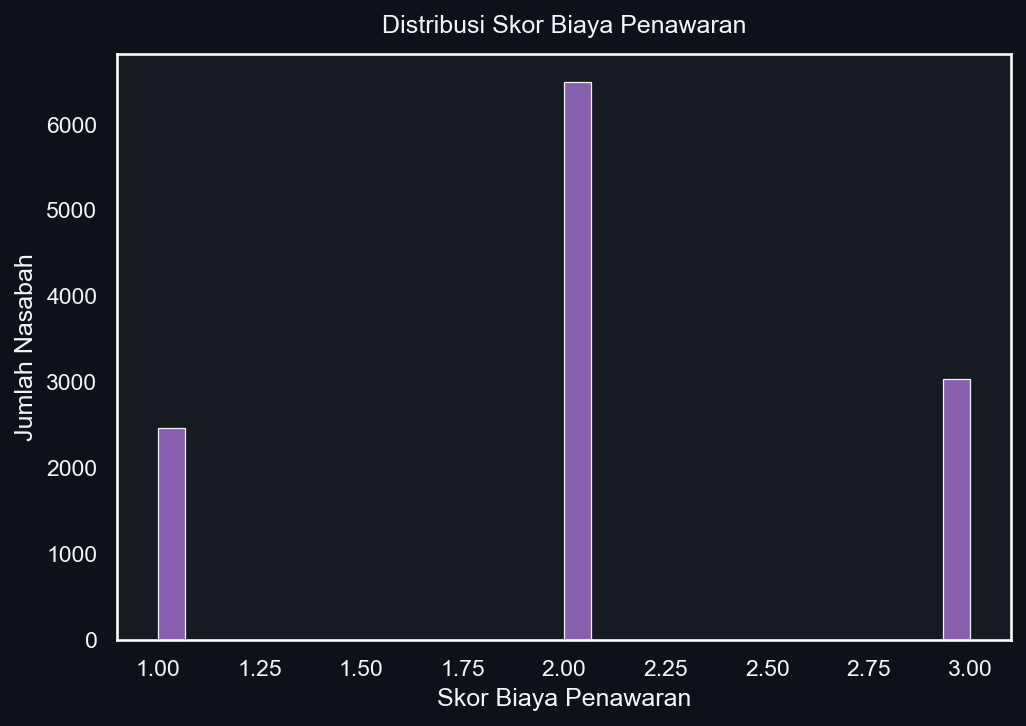

In [13]:
plt.figure(figsize=(7, 5), dpi=150)

# Glow layer
sns.histplot(
    df['skor_biaya_penawaran'],
    bins=30,
    color="#9467bd",
    alpha=0.15,
    linewidth=0
)

# Main layer
sns.histplot(
    df['skor_biaya_penawaran'],
    bins=30,
    color="#9467bd",
    edgecolor="#f0f6fc",
    linewidth=0.6,
    alpha=0.9
)

plt.title("Distribusi Skor Biaya Penawaran", pad=10)
plt.xlabel("Skor Biaya Penawaran")
plt.ylabel("Jumlah Nasabah")

plt.tight_layout()
plt.savefig(
    "distribusi_skor_biaya_penawaran.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)
plt.show()

### Interpretasi Visual: Distribusi Skor Biaya Penawaran

Distribusi skor biaya penawaran menunjukkan pola **trimodal**, di mana data terbagi jelas ke dalam tiga level biaya: **1.0 (rendah)**, **2.0 (menengah)**, dan **3.0 (tinggi)**. Mayoritas nasabah berada pada kategori biaya menengah (skor **2.0**) dengan jumlah sekitar **6.500 orang**, sedangkan kategori biaya rendah (skor **1.0**) mencakup sekitar **2.500 nasabah** dan kategori biaya tinggi (skor **3.0**) sekitar **3.000 nasabah**. Pola yang terpusat pada tiga nilai ini mengindikasikan bahwa biaya penawaran dalam data bersifat **kategori (tiered cost)**, bukan biaya kontinu.

Secara analitis, dominasi biaya menengah menunjukkan bahwa sebagian besar upaya penawaran dilakukan pada kanal dengan effort/biaya moderat, sementara porsi biaya tinggi masih cukup besar sehingga relevan untuk dievaluasi efektivitasnya. Karena skor biaya hanya memiliki tiga kelas, variabel ini dapat diperlakukan sebagai **indikator kanal/effort** yang memudahkan analisis perbandingan (misalnya membandingkan respons atau efisiensi antar level biaya), tanpa perlu mengasumsikan detail biaya aktual di lapangan.

Sebagai tindak lanjut yang ringan namun terukur, lsalah satu langkah lanjutan yang relevan adalah melakukan **pemeriksaan efisiensi per level biaya**, misalnya membandingkan *response rate* atau outcome penawaran pada kelompok biaya **1.0**, **2.0**, dan **3.0**. Jika kelompok biaya tinggi (3.0) tidak menunjukkan perbedaan hasil yang sebanding, maka terdapat peluang untuk melakukan **pergeseran kanal** ke opsi yang lebih hemat (1.0/2.0) pada segmen tertentu. Selain itu, apabila biaya tinggi tetap digunakan, pendekatannya dapat dibatasi pada kelompok nasabah dengan nilai yang lebih tinggi agar effort yang dikeluarkan lebih selaras dengan potensi kontribusi.


---

## Indeks Prioritisasi (Heuristic) untuk Segmentasi Awal

Setelah fitur strategis dianalisis melalui EDA, tahap berikutnya adalah membentuk sebuah **indeks komposit** sebagai ringkasan kuantitatif dari empat dimensi: nilai, keterlibatan, risiko, dan biaya penawaran. Indeks ini bersifat **rule-based (heuristic)** dan digunakan untuk membantu **segmentasi dan eksplorasi prioritas** dalam konteks penawaran deposito, bukan sebagai model prediktif maupun keputusan operasional final.

Empat dimensi yang dirangkum:
- Nilai nasabah (skor_nilai_nasabah)
- Keterlibatan nasabah (skor_keterlibatan_nasabah)
- Risiko nasabah (skor_risiko_nasabah)
- Biaya penawaran (skor_biaya_penawaran)

Logika umum indeks:
- Nilai dan keterlibatan berkontribusi positif
- Risiko dan biaya berkontribusi negatif

Normalisasi dilakukan ke rentang 0–1 untuk menyamakan skala antar dimensi sehingga dapat digabungkan dalam satu indeks komposit.


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['indeks_nilai_nasabah', 'indeks_keterlibatan']] = scaler.fit_transform(
    df[['skor_nilai_nasabah', 'skor_keterlibatan_nasabah']]
)

df[['indeks_risiko', 'indeks_biaya_penawaran']] = scaler.fit_transform(
    df[['skor_risiko_nasabah', 'skor_biaya_penawaran']]
)

df[[
    'indeks_nilai_nasabah',
    'indeks_keterlibatan',
    'indeks_risiko',
    'indeks_biaya_penawaran'
]].head()

,indeks_nilai_nasabah,indeks_keterlibatan,indeks_risiko,indeks_biaya_penawaran
0,0.25,0.01,0.00,0.50
1,0.58,0.01,0.00,1.00
2,0.14,0.02,0.00,0.50
3,0.34,0.04,0.00,1.00
4,0.42,0.02,0.50,0.00


### Interpretasi Awal Indeks Nasabah

Hasil normalisasi menghasilkan empat indeks utama dengan rentang nilai 0–1, 
di mana nilai yang lebih tinggi merepresentasikan intensitas atau tingkat yang lebih kuat 
pada masing-masing dimensi.

- **Indeks Nilai Nasabah**  
  Merepresentasikan potensi nilai finansial nasabah bagi bank. Nilai yang lebih tinggi
  menunjukkan nasabah dengan saldo dan karakteristik nilai yang lebih menarik.

- **Indeks Keterlibatan**  
  Menggambarkan tingkat respons dan interaksi nasabah terhadap aktivitas bank.
  Semakin tinggi nilainya, semakin aktif dan responsif nasabah tersebut.

- **Indeks Risiko**  
  Mencerminkan tingkat risiko relatif nasabah. Nilai yang lebih tinggi menunjukkan
  risiko yang lebih besar sehingga perlu kehati-hatian dalam penawaran produk.

- **Indeks Biaya Penawaran**  
  Menunjukkan estimasi relatif biaya atau effort yang diperlukan untuk melakukan
  penawaran produk kepada nasabah. Nilai tinggi berarti penawaran lebih mahal atau kompleks.

Tahap ini belum menghasilkan keputusan akhir, tetapi membentuk fondasi kuantitatif
untuk menyusun prioritas nasabah secara terintegrasi.


---

## Pembentukan Priority Score (Indeks Komposit)

Priority Score dihitung sebagai kombinasi berbobot dari keempat indeks. Bobot digunakan sebagai **baseline kebijakan** untuk menekankan nilai dan keterlibatan, sambil memberikan penalti pada risiko dan biaya. Pada tahap ini, skor diperlakukan sebagai **alat bantu pemeringkatan awal** untuk keperluan analisis lanjutan (misalnya penyusunan segmen/tier), dan efektivitasnya perlu dievaluasi lebih lanjut jika akan digunakan sebagai dasar eksekusi penawaran.


In [15]:
df['priority_score'] = (
    0.4 * df['indeks_nilai_nasabah'] +
    0.3 * df['indeks_keterlibatan'] -
    0.2 * df['indeks_risiko'] -
    0.1 * df['indeks_biaya_penawaran']
)

df[['priority_score']].describe()

,priority_score
count,"12,000.00"
mean,0.02
std,0.10
min,-0.29
25%,-0.05
50%,0.02
75%,0.08
max,0.39


In [16]:
df[[
    'indeks_nilai_nasabah',
    'indeks_keterlibatan',
    'indeks_risiko',
    'indeks_biaya_penawaran',
    'priority_score'
]].head()

,indeks_nilai_nasabah,indeks_keterlibatan,indeks_risiko,indeks_biaya_penawaran,priority_score
0,0.25,0.01,0.00,0.50,0.05
1,0.58,0.01,0.00,1.00,0.14
2,0.14,0.02,0.00,0.50,0.01
3,0.34,0.04,0.00,1.00,0.05
4,0.42,0.02,0.50,0.00,0.07


### Interpretasi Awal Priority Score Nasabah

Priority Score merupakan metrik komposit yang menggabungkan empat dimensi utama,
yaitu nilai nasabah, keterlibatan, risiko, dan biaya penawaran, ke dalam satu skor
untuk mendukung proses prioritisasi penawaran deposito.

#### Distribusi Priority Score
Berdasarkan statistik deskriptif:
- Nilai **rata-rata (mean)** priority score berada di sekitar **0.02**, dengan median yang juga berada di kisaran yang sama.
  Hal ini menunjukkan bahwa sebagian besar nasabah berada pada tingkat prioritas menengah.
- Nilai **minimum (-0.29)** merepresentasikan nasabah dengan kombinasi risiko dan biaya yang relatif tinggi
  dibandingkan nilai dan keterlibatannya.
- Nilai **maksimum (0.39)** menunjukkan kelompok kecil nasabah dengan potensi nilai dan keterlibatan tinggi
  serta risiko dan biaya yang relatif rendah.
- Sebaran skor (std ≈ 0.10) mengindikasikan adanya variasi prioritas yang cukup jelas,
  sehingga memungkinkan proses pemeringkatan nasabah dilakukan secara bermakna.

#### Interpretasi Contoh Observasi
Beberapa contoh awal menunjukkan bagaimana Priority Score terbentuk secara logis:
- Nasabah dengan **indeks nilai nasabah yang tinggi** dan **indeks risiko yang rendah**
  cenderung memiliki priority score yang lebih tinggi, meskipun biaya penawarannya tidak selalu minimal.
- Nasabah dengan **risiko yang meningkat**, meskipun memiliki nilai yang cukup baik,
  mengalami penurunan priority score akibat adanya penalti risiko dalam perhitungan.
- Nasabah dengan nilai dan keterlibatan rendah, meskipun berisiko rendah,
  tetap menghasilkan priority score yang relatif kecil karena kontribusi nilai bisnisnya terbatas.

### Catatan Penggunaan
Skor ini membantu:
- melihat perbedaan relatif antar nasabah pada empat dimensi secara ringkas,
- menyusun tier/segmen untuk analisis,
- mengidentifikasi kelompok yang perlu pendekatan berbeda (mis. risiko tinggi atau biaya tinggi).

Skor ini tidak secara langsung mengklaim keberhasilan penawaran tanpa evaluasi tambahan.


### Customer Priority Matrix — Nilai vs Risiko (Segmentasi Analitis)

Bagian ini menyusun segmentasi 2×2 berbasis **nilai** dan **risiko** untuk membantu membaca profil basis nasabah dalam konteks penawaran deposito.

- **Nilai (indeks_nilai_nasabah):** proksi potensi kontribusi finansial
- **Risiko (indeks_risiko):** proksi kehati-hatian (kategori risiko relatif)

Pembagian dilakukan menggunakan **ambang median** untuk memperoleh kategori *relatif tinggi* vs *relatif rendah* pada masing-masing dimensi, sehingga segmentasi adaptif terhadap distribusi data.

Empat kuadran yang dihasilkan dapat diinterpretasikan sebagai:
1. **High Value / Low Risk** — kandidat prioritas lebih tinggi untuk dianalisis lebih lanjut
2. **High Value / High Risk** — kandidat bernilai, namun perlu perhatian terhadap faktor risiko
3. **Low Value / Low Risk** — kandidat untuk pendekatan berbiaya lebih efisien
4. **Low Value / High Risk** — kandidat untuk pendekatan yang lebih hati-hati

Sebagai langkah lanjutan (opsional), skor komposit (`priority_score`) dapat digunakan untuk **pemeringkatan relatif** di dalam tiap segmen dan membentuk *tier* (mis. top 20%, 20–50%, sisanya) sebagai dasar analisis perbandingan antar tier. Jika akan digunakan untuk eksekusi penawaran, diperlukan evaluasi tambahan (mis. perbandingan response rate/efisiensi biaya antar tier).


In [17]:
# 1. Threshold adaptif
ambang_nilai = df['indeks_nilai_nasabah'].median()
ambang_risiko = df['indeks_risiko'].median()

# 2. Segmentasi Nilai × Risiko
def tentukan_segmen(row, nilai_cut, risiko_cut):
    label_nilai = 'Nilai_Tinggi' if row['indeks_nilai_nasabah'] >= nilai_cut else 'Nilai_Rendah'
    label_risiko = 'Risiko_Tinggi' if row['indeks_risiko'] >= risiko_cut else 'Risiko_Rendah'
    return f"{label_nilai}_{label_risiko}"

df['segmen_prioritas_nasabah'] = df.apply(
    tentukan_segmen, axis=1, args=(ambang_nilai, ambang_risiko)
)

# 3. Ranking prioritas dalam segmen
df['peringkat_prioritas_dalam_segmen'] = (
    df.groupby('segmen_prioritas_nasabah')['priority_score']
      .transform(lambda x: x.rank(pct=True, method='average'))
)

# 4. Tingkat prioritas operasional
def tentukan_tingkat(pct):
    if pct <= 0.20:
        return 'Prioritas_Utama'
    elif pct <= 0.50:
        return 'Prioritas_Menengah'
    else:
        return 'Prioritas_Rendah'

df['tingkat_prioritas_operasional'] = (
    df['peringkat_prioritas_dalam_segmen'].apply(tentukan_tingkat)
)

# 5. Ringkasan strategis per segmen
ringkasan_segmen = df.groupby('segmen_prioritas_nasabah').agg(
    jumlah_nasabah=('priority_score', 'count'),
    rata_priority_score=('priority_score', 'mean'),
    tingkat_respon=('respon_penawaran_deposito', 'mean')
).reset_index()

display(ringkasan_segmen.sort_values('rata_priority_score', ascending=False))

,segmen_prioritas_nasabah,jumlah_nasabah,rata_priority_score,tingkat_respon
1,Nilai_Tinggi_Risiko_Tinggi,6000,0.07,0.16
0,Nilai_Rendah_Risiko_Tinggi,6000,-0.04,0.13


## Interpretasi Awal: Segmentasi Nilai × Risiko (Ringkasan Analitis)

Segmentasi ini membagi nasabah berdasarkan kombinasi **nilai** dan **risiko** untuk membantu membaca perbedaan karakteristik antar kelompok. Ringkasan berikut menggunakan **rata-rata `priority_score`** dan **response rate historis** sebagai indikator deskriptif pada masing-masing segmen.

### Segmen Nilai Tinggi – Risiko Tinggi
Segmen ini memiliki **rata-rata `priority_score` tertinggi (0.07)** dan **response rate tertinggi (16%)** pada data yang tersedia. Temuan ini menunjukkan bahwa pada dataset ini, kelompok bernilai tinggi tetap memperlihatkan outcome respons yang relatif lebih tinggi meskipun berada pada kategori risiko yang lebih tinggi.

**Catatan interpretasi:**
- Temuan ini bersifat deskriptif (berdasarkan data historis) dan dapat digunakan sebagai bahan pertimbangan untuk analisis lanjutan terkait diferensiasi pendekatan antar segmen.
- Faktor risiko tetap relevan untuk diperhatikan karena dapat mempengaruhi kebijakan penawaran pada implementasi nyata.

### Segmen Nilai Rendah – Risiko Tinggi
Segmen ini memiliki **rata-rata `priority_score` negatif (-0.04)** dan **response rate lebih rendah (13%)**. Secara deskriptif, kombinasi nilai yang lebih rendah dengan risiko yang lebih tinggi berkorelasi dengan outcome respons yang lebih rendah dibanding segmen bernilai tinggi (dalam kategori risiko yang sama).

**Catatan interpretasi:**
- Segmen ini dapat menjadi kandidat untuk pendekatan yang lebih efisien biaya jika dilakukan aktivitas penawaran, namun klaim efektivitas perlu ditinjau lebih lanjut melalui evaluasi per kanal/biaya.

### Ringkasan
Secara umum, hasil segmentasi menunjukkan bahwa membedakan nasabah berdasarkan kombinasi **nilai dan risiko** memberikan sudut pandang tambahan dibanding analisis satu dimensi. Ringkasan ini dapat digunakan sebagai dasar untuk langkah berikutnya, misalnya **pembentukan tier analitis (berbasis persentil) dan perbandingan metrik outcome antar tier**, sebelum ditarik menjadi rekomendasi eksekusi penawaran.


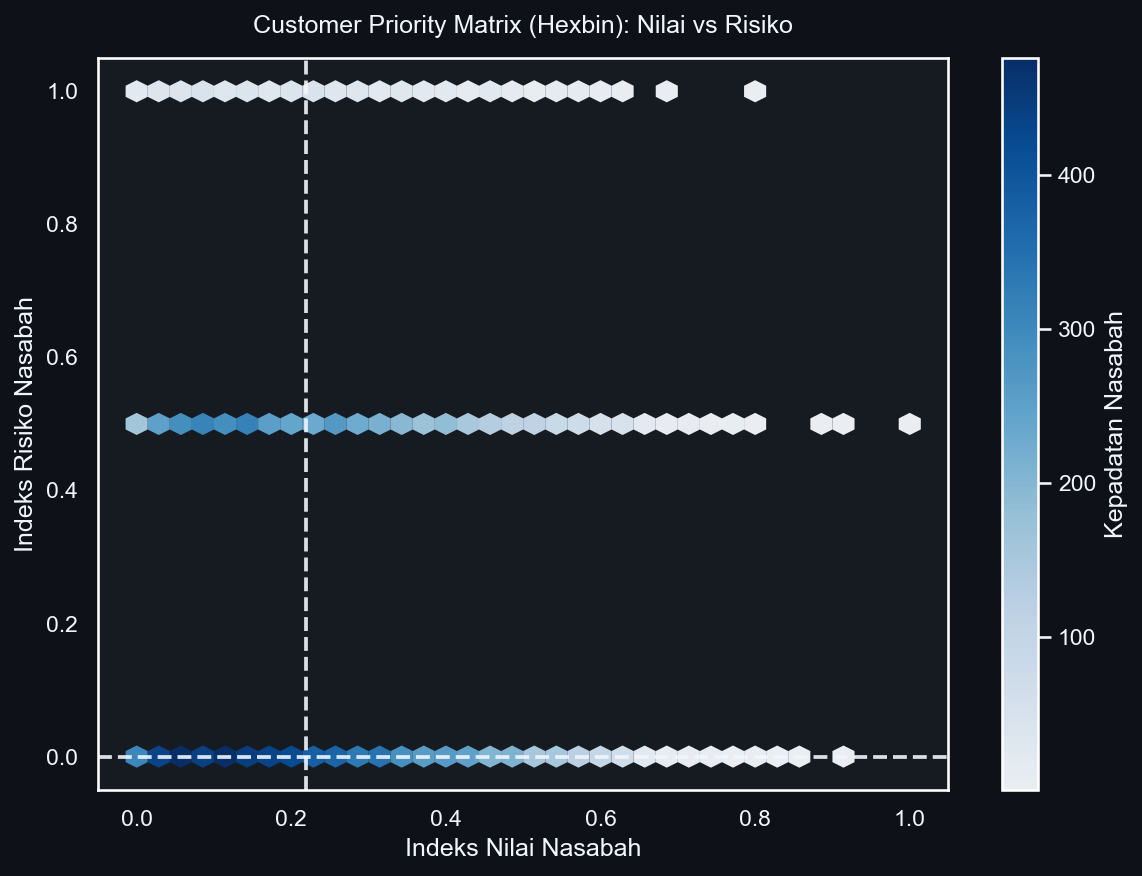

In [18]:
plt.figure(figsize=(8, 6), dpi=150)

# Hexbin plot
hb = plt.hexbin(
    df['indeks_nilai_nasabah'],
    df['indeks_risiko'],
    gridsize=35, 
    mincnt=1,
    cmap="Blues",
    linewidths=0.0,
    alpha=0.95
)

# Colorbar (density)
cbar = plt.colorbar(hb)
cbar.set_label("Kepadatan Nasabah")

# Threshold lines
plt.axvline(
    ambang_nilai,
    linestyle="--",
    linewidth=1.8,
    color="#f0f6fc",
    alpha=0.9
)

plt.axhline(
    ambang_risiko,
    linestyle="--",
    linewidth=1.8,
    color="#f0f6fc",
    alpha=0.9
)

# Titles & labels
plt.title("Customer Priority Matrix (Hexbin): Nilai vs Risiko", pad=12)
plt.xlabel("Indeks Nilai Nasabah")
plt.ylabel("Indeks Risiko Nasabah")

plt.tight_layout()

plt.savefig(
    "customer_priority_matrix_hexbin.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)

plt.show()

### Interpretasi Visual: Customer Priority Matrix (Nilai × Risiko)

Berdasarkan visualisasi **Hexbin Plot** yang memetakan **Indeks Nilai** terhadap **Indeks Risiko**, berikut adalah poin-poin analisis strategisnya:

#### 1. Stratifikasi Risiko Diskrit
* Data menunjukkan pengelompokan horizontal yang sangat jelas pada tiga level indeks risiko: **0.0, 0.5, dan 1.0**.
* Hal ini mencerminkan bahwa profil risiko nasabah dikategorikan secara diskrit berdasarkan variabel kepemilikan pinjaman dan riwayat gagal bayar.
* Konsentrasi massa terbesar berada pada indeks risiko **0.0**, menunjukkan portofolio nasabah yang didominasi profil risiko rendah.

#### 2. Analisis Kepadatan Populasi (Hotspots)
* **Dominasi Mass Market:** Area dengan warna biru paling pekat (kepadatan nasabah tertinggi) berada di kuadran **Nilai Rendah – Risiko Rendah**.
* **Kelompok Eksklusif:** Seiring meningkatnya indeks nilai ke arah kanan (> 0.6), kepadatan nasabah menurun secara signifikan (warna semakin terang), menandakan nasabah bernilai tinggi adalah kelompok minoritas yang memerlukan perlakuan khusus.

#### 3. Pemetaan Strategis per Kuadran
| Kuadran | Karakteristik | Rekomendasi Aksi |
| :--- | :--- | :--- |
| **Kanan Bawah** | *High Value, Low Risk* | **Prioritas Utama:** Target utama penawaran deposito melalui kanal personal atau Relationship Manager karena potensi saldo besar dengan risiko minimal. |
| **Kiri Bawah** | *Low Value, Low Risk* | **Efisiensi Biaya:** Basis nasabah terbesar yang sebaiknya dikelola melalui kanal digital otomatis (WhatsApp/Email) untuk menjaga efisiensi biaya operasional. |
| **Sisi Atas** | *High Risk (Skor $\ge$ 0.5)* | **Selektivitas Tinggi:** Meskipun memiliki *response rate* historis yang cukup baik (~16%), penawaran harus tetap selektif dengan mempertimbangkan eksposur risiko kredit nasabah. |

#### 4. Kesimpulan Analitis
Distribusi pada matriks ini menegaskan bahwa strategi bank harus terdiferensiasi: fokus pada **volume dan efisiensi** untuk nasabah di sisi kiri matriks, serta fokus pada **nilai dan layanan personal** untuk nasabah di sisi kanan matriks guna mengoptimalkan pertumbuhan Dana Pihak Ketiga (DPK)

## Interpretasi Visual: Customer Priority Matrix (Nilai × Risiko)

Visualisasi ini menampilkan sebaran nasabah berdasarkan kombinasi **indeks nilai** dan **indeks risiko**, dengan garis median sebagai pembatas adaptif untuk membentuk empat area analitis utama.

### Pola Umum Sebaran
Secara visual, terlihat bahwa:
- **Indeks risiko** cenderung bersifat diskrit (menumpuk pada beberapa level tertentu), mengindikasikan adanya sistem kategorisasi risiko yang relatif kaku.
- **Indeks nilai** memiliki sebaran yang lebih kontinu, menunjukkan variasi potensi nilai ekonomi yang cukup lebar antar nasabah.

Kombinasi kedua dimensi ini menghasilkan empat area analitis (kuadran) yang mencerminkan perbedaan karakteristik nasabah.

### Karakteristik Empat Area Analitis

| Area | Karakteristik Umum |
|------|-------------------|
| **Nilai Tinggi – Risiko Rendah** | Nasabah dengan potensi nilai tinggi dan profil risiko relatif rendah |
| **Nilai Tinggi – Risiko Tinggi** | Nasabah bernilai tinggi dengan tingkat risiko yang perlu dicermati |
| **Nilai Rendah – Risiko Rendah** | Nasabah dengan nilai ekonomi terbatas namun relatif aman |
| **Nilai Rendah – Risiko Tinggi** | Nasabah dengan nilai dan risiko yang sama-sama relatif tidak menguntungkan |

Pembagian ini tidak dimaksudkan sebagai keputusan akhir, melainkan sebagai **alat bantu visual untuk memahami heterogenitas basis nasabah**.

### Keterkaitan dengan Priority Score
Selain segmentasi visual, setiap nasabah juga memiliki **priority score** yang digunakan untuk melakukan pemeringkatan relatif *di dalam masing-masing area*. Pendekatan ini memungkinkan:

- Perbandingan nasabah dengan karakteristik nilai–risiko yang sebanding
- Identifikasi variasi prioritas relatif tanpa membandingkan nasabah lintas segmen secara langsung

### Catatan Analitis
Visualisasi ini berfungsi sebagai:
- Ringkasan eksploratif hubungan antara nilai dan risiko
- Fondasi untuk analisis lanjutan berbasis ranking dan tiering
- Alat komunikasi awal sebelum dilakukan evaluasi performa berbasis metrik outcome

Tahap ini **belum merepresentasikan keputusan operasional**, melainkan membantu menyusun kerangka analisis yang lebih terstruktur dan terukur.


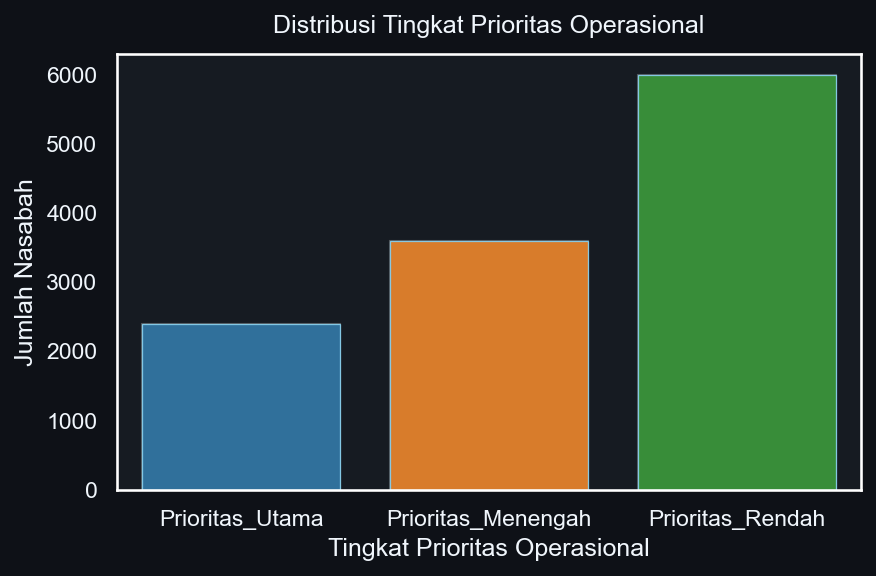

In [19]:
plt.figure(figsize=(6, 4), dpi=150)

order_prioritas = [
    "Prioritas_Utama",
    "Prioritas_Menengah",
    "Prioritas_Rendah"
]

palette_prioritas = {
    "Prioritas_Utama": "#1f77b4",
    "Prioritas_Menengah": "#ff7f0e",
    "Prioritas_Rendah": "#2ca02c"
}

sns.countplot(
    data=df,
    x="tingkat_prioritas_operasional",
    order=order_prioritas,
    hue="tingkat_prioritas_operasional",
    palette=palette_prioritas,
    legend=False,
    alpha=0.25
)

sns.countplot(
    data=df,
    x="tingkat_prioritas_operasional",
    order=order_prioritas,
    hue="tingkat_prioritas_operasional",
    palette=palette_prioritas,
    legend=False,
    edgecolor="skyblue",
    linewidth=0.6,
    alpha=0.95
)

plt.title("Distribusi Tingkat Prioritas Operasional", pad=10)
plt.xlabel("Tingkat Prioritas Operasional")
plt.ylabel("Jumlah Nasabah")

plt.tight_layout()

plt.savefig(
    "distribusi_tingkat_prioritas_operasional.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)

plt.show()

### Interpretasi Visual: Distribusi Tier Analitis (Berbasis Persentil)

Grafik ini menunjukkan distribusi jumlah nasabah pada tiga **tier analitis** yang dibentuk dari pemeringkatan `priority_score` di dalam masing-masing segmen. Pembagian tier menggunakan aturan persentil: **Top 20%** (Tier 1), **20–50%** (Tier 2), dan **>50%** (Tier 3).

Secara populasi, hasil pembagian menghasilkan:
- **Tier 1 / Prioritas Utama (~2.400 nasabah):** proporsi paling kecil karena merepresentasikan kelompok **Top 20% per segmen**.
- **Tier 2 / Prioritas Menengah (~3.600 nasabah):** kelompok menengah sebagai area transisi dari hasil ranking.
- **Tier 3 / Prioritas Rendah (~6.000 nasabah):** kelompok terbesar (sekitar **50%** dari populasi), sesuai dengan definisi persentil yang mencakup sisa mayoritas data.

Distribusi ini membantu memberikan gambaran **skala** dan **komposisi** tier yang terbentuk, sehingga dapat digunakan sebagai dasar perencanaan analisis lanjutan—misalnya membandingkan **response rate historis** atau karakteristik biaya kanal antar tier—sebelum ditarik menjadi rekomendasi eksekusi penawaran.


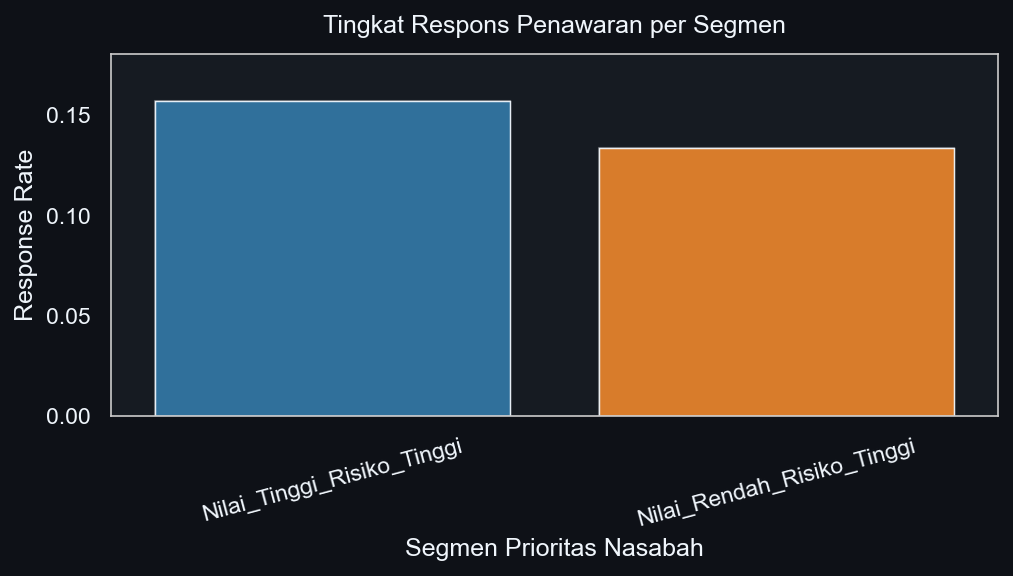

In [20]:
plt.figure(figsize=(7, 4), dpi=150)

# ORDER SEGMENT
order_segmen = ringkasan_segmen.sort_values(
    "tingkat_respon",
    ascending=False
)["segmen_prioritas_nasabah"]

# PALETTE
palette_segmen = {
    segmen: warna
    for segmen, warna in zip(
        order_segmen,
        ["#1f77b4", "#ff7f0e", "#2ca02c"]
    )
}

# BACK (GLOW) LAYER
sns.barplot(
    data=ringkasan_segmen,
    x="segmen_prioritas_nasabah",
    y="tingkat_respon",
    order=order_segmen,
    hue="segmen_prioritas_nasabah",
    palette=palette_segmen,
    legend=False,
    alpha=0.25
)

# MAIN BAR 
ax = sns.barplot(
    data=ringkasan_segmen,
    x="segmen_prioritas_nasabah",
    y="tingkat_respon",
    order=order_segmen,
    hue="segmen_prioritas_nasabah",
    palette=palette_segmen,
    legend=False,
    edgecolor="#f0f6fc",
    linewidth=0.7,
    alpha=0.95
)

# TITLE & LABEL 
plt.title("Tingkat Respons Penawaran per Segmen", pad=10)
plt.xlabel("Segmen Prioritas Nasabah")
plt.ylabel("Response Rate")

# AXIS CONTROL
plt.xticks(rotation=15)
plt.ylim(0, ringkasan_segmen["tingkat_respon"].max() * 1.15)

# KEEP THE BOX
for spine in ax.spines.values():
    spine.set_color("#cccccc")
    spine.set_linewidth(0.8)

plt.tight_layout()

plt.savefig(
    "tingkat_respons_per_segmen.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)

plt.show()

### Interpretasi Visual: Tingkat Respons Penawaran per Segmen

Grafik ini merangkum **response rate historis** pada masing-masing segmen Nilai × Risiko. Hasil ini membantu membandingkan perbedaan outcome antar segmen pada data yang tersedia, namun tidak secara otomatis menyatakan efektivitas strategi tanpa mempertimbangkan faktor lain (mis. kanal penawaran, intensitas kontak, maupun biaya).

#### Perbandingan Response Rate
- **Nilai Tinggi – Risiko Tinggi (≈ 15.5%)** menunjukkan response rate yang lebih tinggi dibanding segmen lainnya pada ringkasan ini.
- **Nilai Rendah – Risiko Tinggi (≈ 13.5%)** memiliki response rate yang lebih rendah, dengan selisih sekitar **±2%** dibanding segmen Nilai Tinggi pada kategori risiko yang sama.

#### Catatan Analitis
Perbedaan response rate ini mengindikasikan bahwa dimensi **nilai nasabah** berasosiasi dengan tingkat respons yang lebih tinggi pada dataset ini, bahkan ketika kategori risiko berada pada level yang sama. Temuan ini dapat dijadikan dasar untuk analisis lanjutan, misalnya:
- membandingkan performa response rate antar segmen setelah dikontrol melalui kanal penawaran/biaya,
- melihat konsistensi pola pada pembagian tier (berbasis persentil) di dalam segmen,
- atau melakukan evaluasi berbasis efisiensi (mis. perbandingan outcome relatif terhadap level biaya penawaran).

#### Implikasi Lanjutan (Opsional)
Jika segmen ini akan digunakan sebagai dasar penyusunan penawaran, langkah yang relevan adalah melakukan pemeriksaan tambahan terkait **biaya kanal, intensitas kontak, dan risiko operasional**, agar perbedaan response rate tidak ditafsirkan secara berlebihan sebagai efek strategi semata.


---

## Triangulasi Analisis dengan Model Machine Learning Supervised 

Bagian ini menggunakan dua model supervised sederhana untuk mengecek konsistensi pola dari EDA dan indeks heuristik terhadap outcome historis:
- Logistic Regression (interpretable baseline)
- Random Forest (non-linear baseline)

Evaluasi difokuskan pada metrik yang relevan untuk target imbalanced:
- PR-AUC dan ROC-AUC
- Response Rate @ Top 10% (skenario penawaran dengan kapasitas kontak terbatas) dan Lift@10%

## (Perkuatan Validitas) Cross-validated evaluation + bootstrap CI + permutation importance

Langkah:
1. Dapatkan probabilitas model secara cross-validated (StratifiedKFold) untuk estimasi metrik yang stabil.
2. Hitung PR-AUC & ROC-AUC dari cv-predictions.
3. Dapatkan bootstrap 95% CI untuk PR-AUC dan Lift@10%.
4. Latih model pada train set, lalu hitung permutation importance pada test set untuk interpretabilitas.


In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, average_precision_score

# === 1) Config ===
TARGET = "respon_penawaran_deposito"
RANDOM_STATE = 42

# Target
y = df[TARGET].astype(int)

# === 2) Anti-leakage feature selection ===
drop_cols = [
    TARGET,
    "skor_nilai_nasabah", "skor_risiko_nasabah",
    "skor_keterlibatan_nasabah", "skor_biaya_penawaran",
    "indeks_nilai_nasabah", "indeks_keterlibatan",
    "indeks_risiko", "indeks_biaya_penawaran",
    "priority_score",
    "segmen_prioritas_nasabah",
    "peringkat_prioritas_dalam_segmen",
    "tingkat_prioritas_operasional"
]

X = df.drop(columns=[c for c in drop_cols if c in df.columns])

# === 3) Preprocessing ===
num_cols = X.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# === 4) Business metric: Lift@Top-K ===
def lift_at_k(y_true, y_score, top_pct=0.10):
    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)

    n = len(y_true)
    k = int(np.ceil(top_pct * n))
    idx = np.argsort(-y_score)[:k]

    rr_top = y_true[idx].mean()
    rr_base = y_true.mean()
    lift = rr_top / rr_base if rr_base > 0 else np.nan

    return rr_top, rr_base, lift, k

# === 5) Models ===
models = {
    "LogisticRegression": Pipeline([
        ("prep", preprocess),
        ("clf", LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
            solver="lbfgs"
        ))
    ]),
    "RandomForest": Pipeline([
        ("prep", preprocess),
        ("clf", RandomForestClassifier(
            n_estimators=400,
            random_state=RANDOM_STATE,
            class_weight="balanced_subsample",
            n_jobs=-1
        ))
    ])
}

# === 6) Cross-validated evaluation ===
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=RANDOM_STATE
)

results = []

for name, model in models.items():

    cv_proba = cross_val_predict(
        model,
        X,
        y,
        cv=cv,
        method="predict_proba",
        n_jobs=-1
    )[:, 1]

    roc = roc_auc_score(y, cv_proba)
    pr_auc = average_precision_score(y, cv_proba)

    rr10, rr_base, lift10, k = lift_at_k(y, cv_proba, top_pct=0.10)

    results.append({
        "Model": name,
        "PR_AUC_CV": pr_auc,
        "ROC_AUC_CV": roc,
        "Base_Response_Rate": rr_base,
        "Top10_Response_Rate": rr10,
        "Lift_at_10pct": lift10,
        "Top10_n": k
    })

results_df = (
    pd.DataFrame(results)
      .sort_values("PR_AUC_CV", ascending=False)
)

results_df

,Model,PR_AUC_CV,ROC_AUC_CV,Base_Response_Rate,Top10_Response_Rate,Lift_at_10pct,Top10_n
0,LogisticRegression,0.27,0.67,0.15,0.34,2.36,1200
1,RandomForest,0.23,0.63,0.15,0.30,2.07,1200


Pada visualisasi dibawah ini, skala warna dinormalisasi per metrik sehingga perbedaan intensitas warna merepresentasikan kinerja relatif antar model, sementara nilai numerik yang ditampilkan tetap merupakan nilai asli dari masing-masing metrik.
Pendekatan ini bertujuan untuk membantu interpretasi visual tanpa mengubah makna kuantitatif dari hasil evaluasi yang telah disajikan pada tabel.

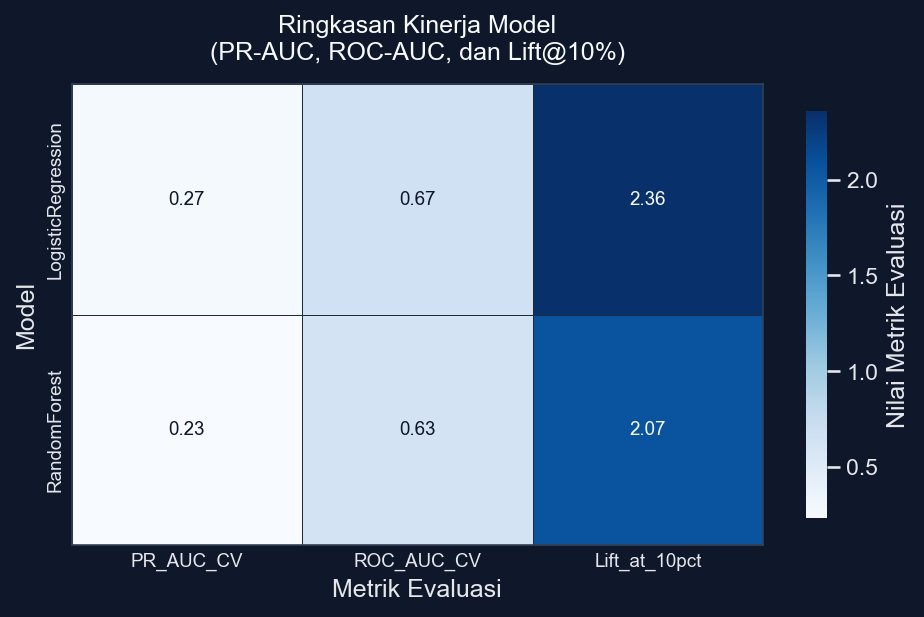

In [22]:
sns.set_theme(style="dark")

metric_cols = [
    "PR_AUC_CV",
    "ROC_AUC_CV",
    "Lift_at_10pct"
]

heatmap_df = (
    results_df
    .set_index("Model")[metric_cols]
)

fig, ax = plt.subplots(figsize=(6.5, 4), dpi=150)
fig.patch.set_facecolor("#0f172a")
ax.set_facecolor("#0f172a")

hm = sns.heatmap(
    heatmap_df,
    annot=heatmap_df.round(2),
    fmt="",
    cmap="Blues",
    linewidths=0.4,
    linecolor="#1e293b",
    square=True,
    cbar=True,
    annot_kws={"size": 9},
    cbar_kws={
        "label": "Nilai Metrik Evaluasi",
        "shrink": 0.85
    },
    ax=ax
)

vmin, vmax = heatmap_df.min().min(), heatmap_df.max().max()
threshold = vmin + 0.6 * (vmax - vmin)

for text in ax.texts:
    value = float(text.get_text())
    text.set_color("#f8fafc" if value >= threshold else "#0f172a")

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color("#334155")
    spine.set_linewidth(0.8)

ax.tick_params(
    axis="both",
    colors="#e5e7eb",
    length=0,
    labelsize=9
)

ax.set_title(
    "Ringkasan Kinerja Model\n(PR-AUC, ROC-AUC, dan Lift@10%)",
    color="#f8fafc",
    pad=12
)
ax.set_xlabel("Metrik Evaluasi", color="#e5e7eb")
ax.set_ylabel("Model", color="#e5e7eb")

cbar = hm.collections[0].colorbar
cbar.ax.yaxis.label.set_color("#e5e7eb")
cbar.ax.tick_params(colors="#e5e7eb")

plt.tight_layout()

plt.savefig(
    "heatmap_ringkasan_kinerja_model_dark.png",
    dpi=300,
    transparent=True,
    bbox_inches="tight"
)

plt.show()

## Validasi Analisis: Dari EDA ke Model Statistik (Pendekatan Triangulasi)

Tahap sebelumnya telah melakukan **Exploratory Data Analysis (EDA)** dan penyusunan **indeks prioritas nasabah** berbasis dimensi nilai, keterlibatan, risiko, dan biaya penawaran.  
EDA digunakan untuk menggambarkan **heterogenitas basis nasabah** dari sisi nilai ekonomi, tingkat risiko, serta variasi respons historis terhadap penawaran deposito.

Sebagai pelengkap EDA, dilakukan validasi tambahan menggunakan pendekatan **supervised learning ringan**.  
Tujuan tahap ini **bukan membangun model prediksi operasional**, melainkan untuk memberikan **dukungan kuantitatif tambahan** mengenai apakah pola yang teramati pada EDA **konsisten dengan outcome historis (respon penawaran deposito)**.

### Tujuan Validasi dengan Model Statistik
Pendekatan ini digunakan untuk mengecek pertanyaan berikut:

> *Apakah perbedaan karakteristik nasabah yang teridentifikasi pada EDA menunjukkan indikasi asosiasi dengan perbedaan tingkat respons terhadap penawaran deposito?*

Dengan kata lain, model digunakan sebagai **alat cross-check (sanity check)** terhadap pola yang muncul dari EDA.

### Desain Validasi
- Target: **respon_penawaran_deposito** (biner)
- Fitur: **fitur asli nasabah**  
  (tanpa indeks, skor, atau variabel turunan heuristik untuk menghindari data leakage)
- Metode evaluasi:
  - Stratified cross-validation
  - Metrik untuk data imbalanced:
    - **PR-AUC**
    - **ROC-AUC**
    - **Lift pada Top 10% populasi**
- Model yang digunakan:
  - **Logistic Regression** (baseline linier & interpretable)
  - **Random Forest** (baseline non-linier untuk menangkap pola/interaksi yang lebih kompleks)

### Ringkasan Hasil Validasi Model

| Model | PR-AUC (CV) | ROC-AUC (CV) | Base Response Rate | Top 10% Response Rate | Lift @ 10% |
|---|---|---|---|---|---|
| Logistic Regression | 0.27 | 0.67 | 0.15 | 0.34 | **2.36×** |
| Random Forest | 0.23 | 0.63 | 0.15 | 0.30 | **2.07×** |

### Interpretasi Hasil dalam Konteks EDA
Hasil ini menunjukkan bahwa:
- Kedua model mampu menghasilkan **kelompok Top 10%** dengan response rate yang **lebih tinggi** dibanding baseline populasi (≈0.30–0.34 vs 0.15), yang tercermin pada Lift@10% sekitar **2.07×–2.36×**.
- Performa yang relatif konsisten pada dua pendekatan berbeda (linier dan non-linier) memberikan **indikasi bahwa terdapat sinyal yang stabil** pada fitur asli yang berasosiasi dengan outcome historis.
- Temuan ini **mendukung** hasil EDA bahwa basis nasabah bersifat heterogen dan terdapat subset nasabah yang lebih “responsif” dibanding populasi umum, meskipun interpretasi tetap bersifat **deskriptif-asosiatif** (bukan kausal).

Temuan ini selaras dengan arah EDA bahwa:
- Nasabah dengan proksi **nilai ekonomi lebih tinggi** cenderung menunjukkan respons yang lebih tinggi (pada data ini),
- Dimensi **risiko dan kanal/biaya penawaran** relevan sebagai variabel segmentasi untuk evaluasi perbedaan outcome,
- Basis nasabah tidak ideal diperlakukan seragam ketika menyusun rekomendasi penawaran.

### Posisi Model dalam Keseluruhan Analisis
Penting untuk ditegaskan bahwa:
- Model statistik **tidak menggantikan** segmentasi dan indeks heuristik,
- Model digunakan sebagai **validasi kuantitatif tambahan** untuk mengecek konsistensi pola EDA terhadap outcome historis,
- Fokus analisis tetap pada **pemahaman pola dan penyusunan rekomendasi awal**, bukan optimasi prediksi individual.

Dengan demikian, tahap ini berfungsi sebagai **penguat analitis** bahwa kerangka segmentasi dan pemeringkatan yang dibangun sebelumnya memiliki **dukungan empiris pada data historis**, dan dapat digunakan sebagai dasar analisis lanjutan (misalnya evaluasi per kanal/biaya atau uji sensitivitas bobot indeks) sebelum dipertimbangkan untuk eksekusi penawaran.


---
---

# Penutup  
## Insight from Analysis

### 1. Tujuan dan Kerangka Analisis  
Analisis ini bertujuan untuk memperoleh pemahaman menyeluruh mengenai **profil nasabah dalam konteks penawaran deposito** dengan menggunakan pendekatan multidimensi yang mencakup **nilai nasabah (customer value), risiko, keterlibatan, dan efisiensi biaya**. Fokus utama analisis bukan pada perancangan strategi pemasaran, melainkan pada pembentukan **kerangka analitis** yang mampu membaca heterogenitas nasabah secara kuantitatif dan terstruktur.

Pendekatan yang digunakan mengombinasikan eksplorasi data terarah, pembentukan fitur berbasis pemahaman bisnis, penyusunan indeks prioritas heuristik, serta validasi pola menggunakan model supervised sebagai bentuk triangulasi analitis.

---

### 2. Insight dari Alur Analisis (Analytical Workflow)

Alur analisis disusun secara bertahap untuk memastikan bahwa setiap temuan memiliki landasan data yang konsisten.

1. **Data readiness** menunjukkan bahwa dataset (n = 12.000) memiliki distribusi target yang tidak seimbang dengan response rate historis sebesar **14.53%**, mengindikasikan tantangan umum dalam konteks penawaran produk finansial.
2. **Feature engineering** menghasilkan empat skor utama yang merepresentasikan dimensi nilai, risiko, keterlibatan, dan biaya penawaran, yang selanjutnya digunakan sebagai fondasi analisis.
3. **Exploratory Data Analysis (EDA)** memperlihatkan pola distribusi yang tidak simetris (right-skewed) pada nilai dan keterlibatan, serta struktur diskrit pada dimensi risiko dan biaya.
4. **Indeks prioritas (priority score)** dibentuk melalui normalisasi dan penggabungan skor multidimensi, sehingga memungkinkan pemeringkatan relatif antar nasabah.
5. **Segmentasi Nilai × Risiko dan tiering berbasis persentil** digunakan untuk membaca perbedaan karakteristik dan respons antar kelompok.
6. **Triangulasi menggunakan model supervised** dilakukan untuk menguji konsistensi pola analitis terhadap outcome historis tanpa mengklaim hubungan kausal.

---

### 3. Insight Utama dari Hasil Analisis

#### 3.1 Heterogenitas Nilai dan Keterlibatan Nasabah  
Distribusi **nilai nasabah** dan **keterlibatan** menunjukkan konsentrasi yang kuat pada kelompok bernilai rendah, sementara hanya sebagian kecil nasabah yang berada pada ekor distribusi bernilai tinggi. Lebih dari **5.000 nasabah** memiliki skor keterlibatan sangat rendah (≈ 0.00–0.05), menandakan basis nasabah yang relatif pasif secara umum.

Insight ini menegaskan bahwa kontribusi dan potensi respons deposito tidak tersebar merata di seluruh populasi nasabah.

---

#### 3.2 Risiko sebagai Variabel Pembeda, Bukan Penentu Tunggal  
Dimensi risiko menunjukkan pola diskrit, dengan mayoritas nasabah berada pada kategori risiko rendah hingga menengah (≈ 7.000 nasabah pada risiko rendah dan ≈ 4.500 pada risiko menengah). Temuan ini mengindikasikan bahwa **risiko tidak selalu berbanding terbalik dengan nilai**, sehingga penggunaannya lebih tepat sebagai variabel pembeda dalam segmentasi, bukan sebagai filter eliminatif.

---

#### 3.3 Efisiensi Biaya dan Konsentrasi Pengeluaran  
Proksi biaya penawaran menunjukkan bahwa sebagian besar aktivitas berada pada kelompok biaya menengah hingga tinggi (≈ 6.500 nasabah biaya menengah dan ≈ 3.000 biaya tinggi). Insight ini mengarah pada potensi inefisiensi apabila pendekatan penawaran dilakukan secara massal tanpa mempertimbangkan nilai dan keterlibatan relatif nasabah.

---

### 4. Insight dari Indeks Prioritas dan Segmentasi

Indeks prioritas yang dibentuk memiliki karakteristik distribusi sebagai berikut:

- Rata-rata priority score: **0.02**
- Rentang nilai: **-0.29 hingga 0.39**
- Interquartile range (IQR): **-0.05 hingga 0.08**

Segmentasi **Nilai × Risiko** menunjukkan perbedaan yang konsisten dalam respons historis. Sebagai contoh:

- Segmen *Nilai Tinggi – Risiko Tinggi* memiliki response rate sekitar **16%** dengan rata-rata priority score **0.07**.
- Segmen *Nilai Rendah – Risiko Tinggi* memiliki response rate lebih rendah (≈ **13%**) dengan priority score negatif.

Insight ini memperlihatkan bahwa **penggabungan dimensi lebih informatif dibandingkan penggunaan satu variabel tunggal**.

---

### 5. Validasi Pola melalui Triangulasi Statistik

Model supervised digunakan sebagai alat validasi, bukan sebagai tujuan prediktif utama:

| Model | PR-AUC | ROC-AUC | Top 10% Response Rate | Lift@10 |
|------|--------|---------|-----------------------|---------|
| Logistic Regression | 0.27 | 0.67 | 0.34 | 2.36× |
| Random Forest | 0.23 | 0.63 | 0.30 | 2.07× |

Dibandingkan baseline response rate **14.53%**, hasil ini menguatkan insight bahwa nasabah dengan priority score tinggi memang menunjukkan kecenderungan respons yang lebih besar secara historis.

---

### 6. Batasan Analitis dan Ruang Lingkup  
Analisis ini bersifat **deskriptif dan asosiatif**, serta dibangun sebagai kerangka pemahaman profil nasabah. Indeks dan bobot yang digunakan bersifat heuristik dan tidak dimaksudkan sebagai keputusan operasional final. Selain itu, data yang digunakan merepresentasikan kondisi historis dan belum mencerminkan biaya aktual maupun dinamika perilaku nasabah secara real-time.

---

### 7. Kesimpulan Insight  
Secara keseluruhan, analisis ini memberikan insight bahwa **basis nasabah deposito bersifat heterogen**, dengan konsentrasi nilai dan respons pada segmen tertentu. Pendekatan multidimensi berbasis nilai, risiko, keterlibatan, dan biaya memungkinkan pembacaan prioritas relatif nasabah secara lebih terstruktur dan informatif, sekaligus menyediakan fondasi analitis yang kuat untuk evaluasi lanjutan sebelum pengambilan keputusan operasional atau strategis.
